<h2>Clone the TensorFlow Models repository and proceed to one of the installation options.</h2>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

<b>Tensorflow - 1.15.0 (Preferred)</b>

In [1]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 38819 (delta 9), reused 19 (delta 4), pack-reused 38794
Receiving objects: 100% (38819/38819), 546.94 MiB | 28.46 MiB/s, done.
Resolving deltas: 100% (26053/26053), done.


# Download protoc file

1.   Extract Files
2.   Compile protos.   




In [ ]:
!wget https://github.com/protocolbuffers/protobuf/releases/download/v3.4.0/protoc-3.4.0-linux-x86_32.zip
#Note - Based on your system the file can be different so look out for the compatible file.

In [2]:
from zipfile import ZipFile
zf = ZipFile('/content/protoc-3.4.0-linux-x86_32.zip')
zf.extractall()
zf.close()
!rm -r /content/protoc-3.4.0-linux-x86_32.zip

In [3]:
# Granting Permission
!chmod -R 777 /content/bin/protoc

In [4]:
import os
os.environ['PYTHONPATH'] += ":/content/models"

import sys
sys.path.append("/content/models")

In [5]:
os.chdir('models/research/')

In [6]:
# Compiling Protos
!sudo /content/bin/protoc object_detection/protos/*.proto --python_out=.

object_detection/protos/input_reader.proto: warning: Import object_detection/protos/image_resizer.proto but not used.


In [8]:
!cp object_detection/packages/tf1/setup.py .

In [9]:
!python -m pip install .

Processing /content/models/research
     |████████████████████████████████| 3.4MB 8.0MB/s 
     |████████████████████████████████| 358kB 50.5MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 63.8MB 41kB/s 
     |████████████████████████████████| 153kB 51.9MB/s 
     |████████████████████████████████| 81kB 11.6MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 829kB 42.7MB/s 
     |████████████████████████████████| 1.4MB 50.7MB/s 
     |████████████████████████████████| 112kB 64.3MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1533413 sha256=76a5085fae43affe97198b1ae077febcb01bf7c7ee1cefab3deb91f6a6094da0
  Stored in directory: /tmp/pip-ephem-wheel-cache-wkyb6l3v/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
  Created wheel for hdfs: filename=hdfs-2.5.8-cp36-none-any.whl size=33213 sha256=e02e7888a32236debf4ebe7504e9e6e5

In [10]:
!python object_detection/builders/model_builder_tf1_test.py

2020-07-18 06:05:34.286763: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params(True)
[  SKIPPED ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params(True)
[ RUN      ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params(False)
[  SKIPPED ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params(False)
[ RUN      ] ModelBuilderTF1Test.test_create_experimental_model
[  SKIPPED ] ModelBuilderTF1Test.test_create_experimental_model
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature(True)
[  SKIPPED ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature(True)
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature(False)
[  SKIPPED ] ModelBuilderTF1Test.test_cre

In [11]:
os.chdir('../../')

In [12]:
os.getcwd()

'/content'

Process to Create Dataset for Training

For fast experiment purpose I have created a dummy dataset download it from here. Otherwise follow the following steps:

1. Create a Folder call it "images/", Collect data your images should be of only jpg type.

2. Split the data into two sets train/ and test/

3. Annotate Images <a href="https://github.com/tzutalin/labelImg">labelImg</a>. It will create xml files for you.

4. Now we will need <a href="https://github.com/datitran/raccoon_dataset/blob/master/xml_to_csv.py">xml_to_csv.py</a>. Changes to be made in the file.

```
xml_to_csv.py

def main():
    for dir in ['train','test']:
        image_path = os.path.join(os.getcwd(), 'images/{}'.format(dir))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv('data/{}_labels.csv'.format(dir), index=None)
        print('Successfully converted xml to csv.')


main()
```

Folder Structure should be:
```
    -images/
       train/
          -image1.jpg
          -image1.xml
        test/
          -image1.jpg

    -xml_to_csv.py
```

5. Create <a href="https://github.com/datitran/raccoon_dataset/blob/master/generate_tfrecord.py">TfRecords</a>. Changes to be made.

```
generate_tfrecord.py

# TO-DO replace this with label map
def class_text_to_int(row_label):
    if row_label == 'pikachu':
        return 1
    else:
        None
```

Folder Structure should be:
```
    -images/
       train/
          -image1.jpg
          -image1.xml
        test/
          -image1.jpg
    -generate_tfrecord.py
    -xml_to_csv.py
```

6. Create a data folder inside images/ and from images/ run the following commands

```
$ python xml_to_csv.py

$ python generate_tfrecord.py --csv_input=data/train_labels.csv  --output_path=data/train.record --image_dir=images/train

$ !python generate_tfrecord.py --csv_input=data/test_labels.csv  --output_path=data/test.record --image_dir=images/test


```

Folder Structure should be:
```
    -data/
       -train_labels.csv
       -train.record
       -test_labels.csv
       -test.record
    -images/
       train/
          -image1.jpg
          -image1.xml
        test/
          -image1.jpg
    -generate_tfrecord.py
    -xml_to_csv.py
```


In [ ]:
!wget https://github.com/Mayankkestwal10/object-detection-files/raw/master/object_detection.zip

In [13]:
# Using dummy Pikachu dataset
zf = ZipFile('/content/object_detection.zip')
zf.extractall()
zf.close()
!rm -r /content/object_detection.zip

In [14]:
os.chdir('object_detection/')

In [15]:
os.listdir()

['xml_to_csv.py', 'data', 'images', 'generate_tfrecord.py']

In [16]:
!mv generate_tfrecord.py /content/
!mv data /content/
!mv images /content/

In [17]:
# !mv object_detection/generate_tfrecord.py /content/
!rm -r /content/object_detection/

In [18]:
os.chdir('/content/')

In [19]:
!pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 41kB/s 
     |████████████████████████████████| 3.8MB 47.3MB/s 
     |████████████████████████████████| 512kB 47.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=f82a006f75971b7e1b84489030318394aa7bdcc9ed0f19714125ac25158f4b21
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: 

In [20]:
!python generate_tfrecord.py --csv_input=data/train_labels.csv  --output_path=data/train.record --image_dir=images/train



W0718 06:08:25.515026 139957165533056 module_wrapper.py:139] From generate_tfrecord.py:85: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0718 06:08:25.564402 139957165533056 module_wrapper.py:139] From generate_tfrecord.py:44: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/data/train.record


In [21]:
!python generate_tfrecord.py --csv_input=data/test_labels.csv  --output_path=data/test.record --image_dir=images/test



W0718 06:08:31.732824 139847971915648 module_wrapper.py:139] From generate_tfrecord.py:85: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0718 06:08:31.740717 139847971915648 module_wrapper.py:139] From generate_tfrecord.py:44: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/data/test.record


In [22]:
os.chdir('/content/')
!mkdir training/

In [23]:
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz

--2020-07-18 06:12:19--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.79.128, 2a00:1450:4013:c05::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.79.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187925923 (179M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’

ssd_mobilenet_v2_co 100%[===================>] 179.22M  80.1MB/s    in 2.2s    

2020-07-18 06:12:22 (80.1 MB/s) - ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’ saved [187925923/187925923]



In [24]:
!tar -xvf /content/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
!rm -r /content/ssd_mobilenet_v2_coco_2018_03_29.tar.gz

ssd_mobilenet_v2_coco_2018_03_29/checkpoint
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.meta
ssd_mobilenet_v2_coco_2018_03_29/pipeline.config
ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb
ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb
ssd_mobilenet_v2_coco_2018_03_29/saved_model/
ssd_mobilenet_v2_coco_2018_03_29/saved_model/variables/
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.index
ssd_mobilenet_v2_coco_2018_03_29/
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.data-00000-of-00001


In [ ]:
!wget https://github.com/Mayankkestwal10/object-detection-files/blob/master/object-detection.pbtxt
!wget https://github.com/Mayankkestwal10/object-detection-files/blob/master/ssd_mobilenet_v2_coco.config
!mv object-detection.pbtxt /content/training/
!mv ssd_mobilenet_v2_coco.config /content/training/

In [40]:
!python /content/models/research/object_detection/model_main.py --logtostderr --train_dir=training/ --pipeline_config_path=training/ssd_mobilenet_v2_coco.config

/usr/local/lib/python3.6/dist-packages/object_detection/utils/visualization_utils.py:29: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  import matplotlib; matplotlib.use('Agg')  # pylint: disable=multiple-statements
W0718 06:54:51.733645 139837382649728 model_lib.py:758] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: None
I0718 06:54:51.733863 139837382649728 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0718 06:54:51.733955 139837382649728 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0718 06:54:51.734032 139837382649728 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0718 06:54:51.734109 139837382649728 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0718 06:54

In [41]:
!rm -r pikachu_inference_graph/

In [42]:
!python /content/models/research/object_detection/export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path training/ssd_mobilenet_v2_coco.config \
    --trained_checkpoint_prefix /tmp/tmp22xkhfu2/model.ckpt-2000 \
    --output_directory pikachu_inference_graph

Instructions for updating:
Please use `layer.__call__` method instead.
W0718 07:10:10.675239 140560270735232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0718 07:10:12.673665 140560270735232 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0718 07:10:12.815959 140560270735232 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0718 07:10:12.851969 140560270735232 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

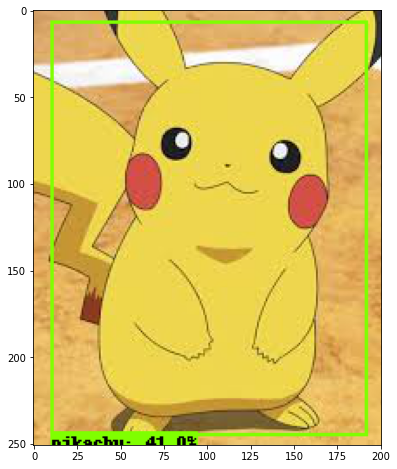

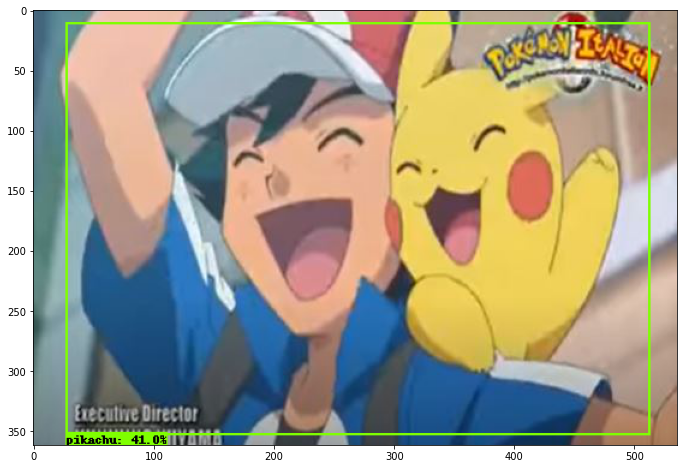

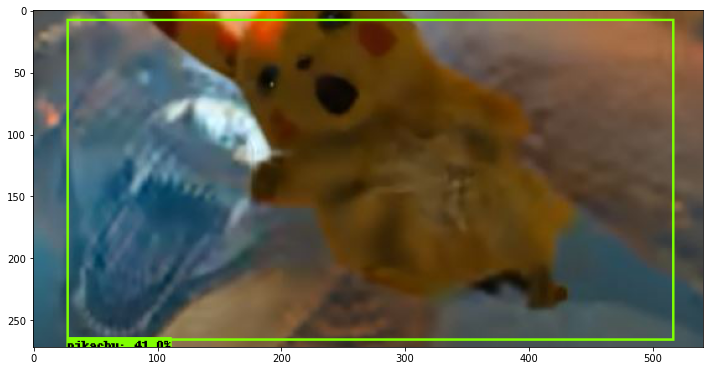

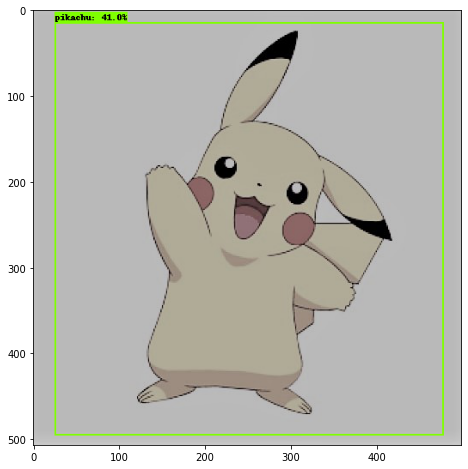

In [46]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
# from google.colab.patches import cv2_imshow
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
%matplotlib inline

from PIL import Image


from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util

# import cv2
# cap = cv2.VideoCapture(0)

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")


# ## Object detection imports
# Here are the imports from the object detection module.



# # Model preparation 

# ## Variables
# 
# Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_CKPT` to point to a new .pb file.  
# 
# By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

# In[4]:

# What model to download.
MODEL_NAME = 'pikachu_inference_graph'
# MODEL_FILE = MODEL_NAME + '.tar.gz'
# DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/training/object-detection.pbtxt'

NUM_CLASSES = 1


# ## Download Model

# In[5]:

# opener = urllib.request.URLopener()
# opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
# tar_file = tarfile.open(MODEL_FILE)
# for file in tar_file.getmembers():
#   file_name = os.path.basename(file.name)
#   if 'frozen_inference_graph.pb' in file_name:
#     tar_file.extract(file, os.getcwd())


# ## Load a (frozen) Tensorflow model into memory.

# In[6]:

detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')


# ## Loading label map
# Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

# In[7]:

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


# ## Helper code

# In[8]:

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)


# # Detection

# In[9]:

# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/content/images/test'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in [1,38,50,8] ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


# In[10]:

with detection_graph.as_default():
  with tf.compat.v1.Session(graph=detection_graph) as sess:
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
      # Each box represents a part of the image where a particular object was detected.
      boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
      # Each score represent how level of confidence for each of the objects.
      # Score is shown on the result image, together with the class label.
      scores = detection_graph.get_tensor_by_name('detection_scores:0')
      classes = detection_graph.get_tensor_by_name('detection_classes:0')
      num_detections = detection_graph.get_tensor_by_name('num_detections:0')
      # Actual detection.
      
      (boxes, scores, classes, num_detections) = sess.run(
          [boxes, scores, classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=2,
          min_score_thresh=0.4)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np) 
    